In [1]:
import xarray as xr
import glob
import numpy as np
# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
#*****************************************************************************************#
#                                PISCO_SENAMHI - RAIN4PE                 
#*****************************************************************************************#
piscoday = xr.open_dataset("D:/T_JONA/TESIS_PISCO/Entrada/Pisco_Pp/Precday.nc")
RAINday = xr.open_dataset("D:/R/RAIN4PE_daily_0.1d_1981_2015_v1.0.nc")

print(piscoday.longitude.attrs)
seas_pp = piscoday.groupby('z.season').mean()
seas_pcp = RAINday.groupby('time.season').mean()

{'standard_name': 'longitude', 'long_name': 'longitude', 'units': 'degrees_east', 'axis': 'X'}


In [26]:
#seas_pp = seas_pp.rename({'variable': 'pr'})
#seas_pp  = seas_pp .rename({'longitude': 'lon', 'latitude': 'lat'})

In [27]:
#seas_pcp = seas_pcp.rename({'pcp': 'pr'})
#seas_pcp = seas_pcp.rename({'Longitude': 'lon', 'Latitude': 'lat'})

In [28]:
seas_pcp

<xarray.Dataset>
Dimensions:  (lon: 150, lat: 210, season: 4)
Coordinates:
  * lon      (lon) float64 -81.95 -81.85 -81.75 -81.65 ... -67.25 -67.15 -67.05
  * lat      (lat) float64 1.95 1.85 1.75 1.65 ... -18.65 -18.75 -18.85 -18.95
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    pr       (season, lat, lon) float32 nan nan nan nan ... 0.2919 0.3013 0.3191
Attributes:
    units:    $mm\,dia^{-1}$

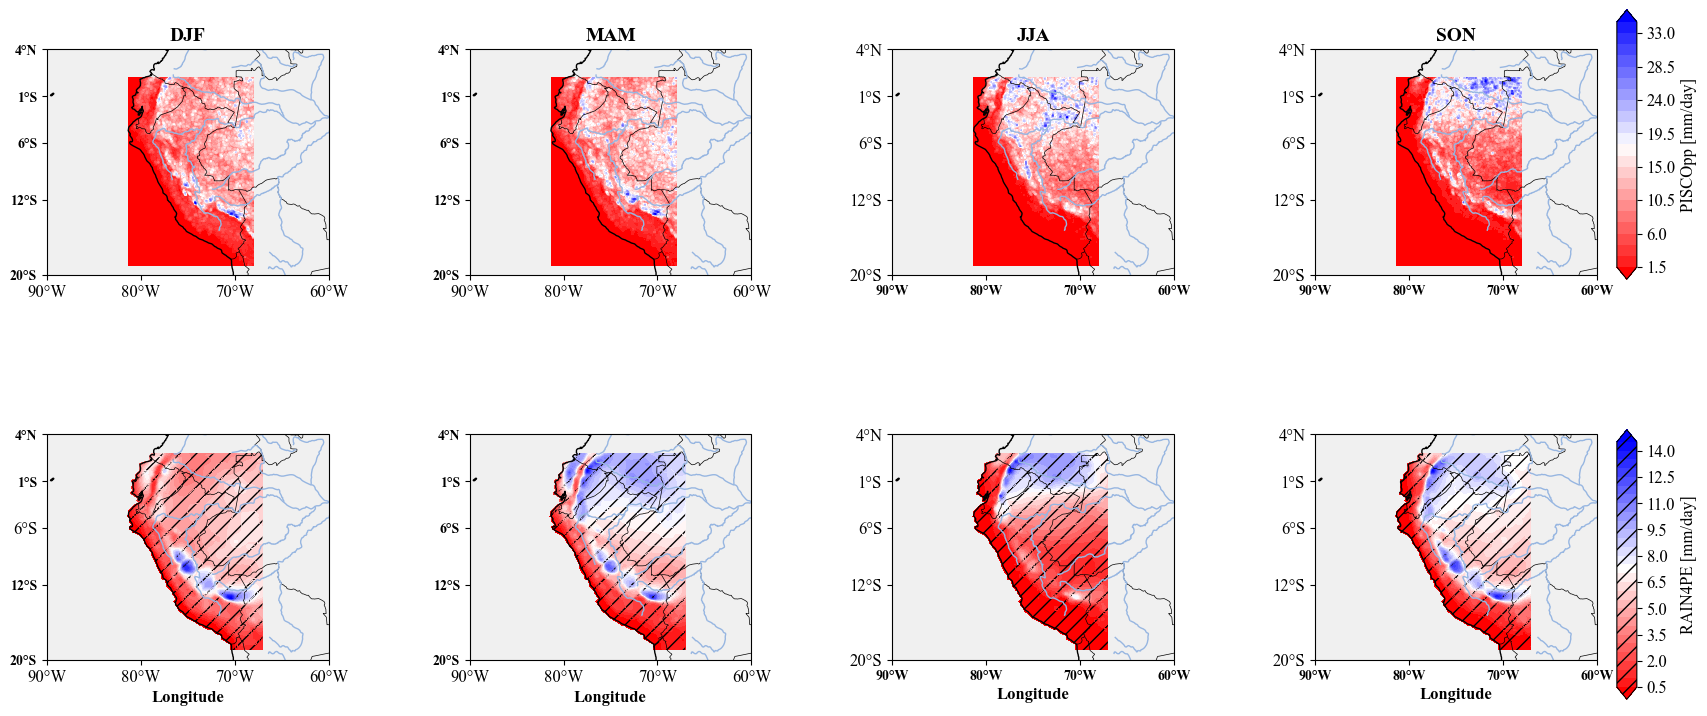

In [4]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.colors as mcolors
import cmocean as cm
import xarray as xr

# Define the projection
projection = ccrs.PlateCarree()

# Set subplots layout and size
fig, axes = plt.subplots(2, 4, sharex=True, sharey=True, subplot_kw=dict(projection=ccrs.PlateCarree()))
fig.set_size_inches(20, 10)  # Ajustar el tamaño del gráfico según tus necesidades

# Define a list of seasons
seasons = ('DJF', 'MAM', 'JJA', 'SON')

# Define a custom colormap based on unique values in the data
def get_custom_colormap(data):
    unique_vals = np.unique(data)
    num_colors = len(unique_vals)
    color_map = plt.cm.get_cmap('bwr_r', num_colors)  # Use a different colormap
    return mcolors.ListedColormap(color_map(np.arange(num_colors)))

# Trazar datos de temporadas
for i, season in enumerate(seasons):
    ax = axes[0, i]  # Primera fila para seas_pp
    data_pp = seas_pp['variable'].sel(season=season)
    vmin_pp, vmax_pp = data_pp.min().values, data_pp.max().values
    
    contour_plot_pp = ax.contourf(data_pp.longitude, data_pp.latitude, data_pp,
                                  transform=projection, cmap=get_custom_colormap(data_pp), levels=30, extend='both',
                                  vmin=vmin_pp, vmax=vmax_pp)
    
    ax.set_xlim(data_pp.longitude.min().values, data_pp.longitude.max().values)
    ax.set_ylim(data_pp.latitude.min().values, data_pp.latitude.max().values)
    ax.set_xticks(np.arange(data_pp.longitude.min().values, data_pp.longitude.max().values, 10), crs=projection)
    ax.set_yticks(np.arange(data_pp.latitude.min().values, data_pp.latitude.max().values, 10), crs=projection)
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_feature(cfeature.RIVERS)
    ax.set_facecolor('#f0f0f0')

    ax = axes[1, i]  # Segunda fila para seas_pcp
    data_pcp = seas_pcp['pcp'].sel(season=season)
    vmin_pcp, vmax_pcp = data_pcp.min().values, data_pcp.max().values
    
    contour_plot_pcp = ax.contourf(data_pcp.Longitude, data_pcp.Latitude, data_pcp,
                                    transform=projection, cmap=get_custom_colormap(data_pcp), levels=30, extend='both',
                                    vmin=vmin_pcp, vmax=vmax_pcp,hatches=['//'] )
    
    ax.set_xlim(data_pcp.Longitude.min().values, data_pcp.Longitude.max().values)
    ax.set_ylim(data_pcp.Latitude.min().values, data_pcp.Latitude.max().values)
    ax.set_xticks(np.arange(data_pcp.Longitude.min().values, data_pcp.Longitude.max().values, 10), crs=projection)
    ax.set_yticks(np.arange(data_pcp.Latitude.min().values, data_pcp.Latitude.max().values, 10), crs=projection)
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_feature(cfeature.RIVERS)
    ax.set_facecolor('#f0f0f0')

# Agregar nombres de estaciones en la primera fila de cada columna
for i, season in enumerate(seasons):
    axes[0, i].set_title(season, fontsize=14, fontweight='bold')

# Valores numéricos de latitud en las dos primeras filas
for ax in axes[:2, :]:
    ax[0].set_yticks([-20, 4], crs=projection)
    ax[0].set_yticklabels(['20°S', '4°N'], fontsize=10, fontweight='bold')
    ax[1].set_yticks([-20, -12,-6,-1,4], crs=projection)
    ax[1].set_yticklabels(['20°S','12°S','6°S','1°S','4°N' ], fontsize=10, fontweight='bold')

# Valores numéricos de longitud en las cuatro últimas columnas
for ax in axes[:, -4:]:
    ax[-1].set_xticks([-70, -80, -90], crs=projection)
    ax[-1].set_xticklabels(['70°W', '80°W', '90°W'], fontsize=10, fontweight='bold')
    ax[-2].set_xticks([-60, -70, -80, -90], crs=projection)
    ax[-2].set_xticklabels(['60°W', '70°W', '80°W', '90°W'], fontsize=10, fontweight='bold')

# Set the x-axis label for the last row
for ax in axes[-1, :]:
    ax.set_xlabel('Longitude', fontsize=12, fontweight='bold')

# Flatten axes and get subplots positions
DP = axes.T.flatten()

# Create colorbars and set their positions dynamically
cax_pp = fig.add_axes([axes[0, -1].get_position().x1 + 0.01, axes[0, -1].get_position().y0, 0.01, axes[0, -1].get_position().height])
fig.colorbar(contour_plot_pp, cax=cax_pp, label='PISCOpp [mm/day]', orientation='vertical', pad=0.01)

cax_pcp = fig.add_axes([axes[1, -1].get_position().x1 + 0.01, axes[1, -1].get_position().y0, 0.01, axes[1, -1].get_position().height])
fig.colorbar(contour_plot_pcp, cax=cax_pcp, label='RAIN4PE [mm/day]', orientation='vertical', pad=0.01)

# Adjust layout
plt.subplots_adjust(wspace=0.5, hspace=0.0)
#plt.savefig("docs/report/gauges_vs_ry_cumsum_2017.png", dpi=300, bbox_inches="tight")
# Save or display the plot
#plt.savefig('seasonal_trend_PISCO_RAIN4PE.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()

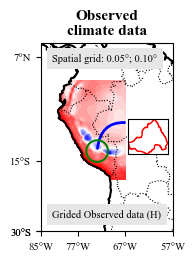

In [89]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.colors as mcolors
import geopandas as gpd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import FancyArrowPatch, Circle
from matplotlib import transforms

from matplotlib import rcParams as rc
rc['font.family'] = 'serif'
rc['font.serif'] = ['Times New Roman']
rc['font.size'] = 12
rc['text.usetex'] = False

# Define la proyección
projection = ccrs.PlateCarree()

# Configurar el layout del subplot y tamaño de la figura
fig, ax_main = plt.subplots(subplot_kw=dict(projection=projection), figsize=(7.45, 2.45))

# Ajustar el área de visualización para el mapa principal (América del Sur)
ax_main.set_extent([-85, -57, -30, 10], crs=projection)

# Define una temporada (DJF)
season = 'DJF'

# Trazar datos de la temporada de invierno para seas_pp (suponiendo que ya tengas los datos)
data_pp = seas_pcp['pcp'].sel(season=season)
vmin_pp, vmax_pp = data_pp.min().values, data_pp.max().values
contour_plot_pp = ax_main.contourf(data_pp.Longitude, data_pp.Latitude, data_pp,
                                   transform=projection, cmap=plt.cm.bwr_r,
                                   levels=30, extend='both', vmin=vmin_pp, vmax=vmax_pp)

# Configuración de elementos del mapa
ax_main.coastlines(linewidth=1.5, color='black')
ax_main.add_feature(cfeature.BORDERS, linestyle='dotted', linewidth=0.8, edgecolor='black')

# Añadir etiquetas de latitud y longitud
ax_main.set_yticks([-15, -30, -30, 7], crs=projection)
ax_main.set_yticklabels(['15°S','30°S', '30°S','7°N'], fontsize=7.7)
ax_main.set_xticks([-57, -67, -77, -85], crs=projection)
ax_main.set_xticklabels(['57°W', '67°W', '77°W', '85°W'], fontsize=7.7)

# Añadir título
plt.title("Observed\nclimate data", fontsize=11, fontweight='bold')

# Añadir texto de información
info_box_text = 'Grided Observed data (H)'
ax_main.text(-82.5, -27, info_box_text, transform=ccrs.PlateCarree(), fontsize=7.5, bbox=dict(facecolor='.9', edgecolor='none'))

info_box_text = 'Spatial grid: 0.05°; 0.10°'
ax_main.text(-82.5, 6, info_box_text, transform=ccrs.PlateCarree(), fontsize=7.5, bbox=dict(facecolor='.9' , edgecolor='none'))

# Crear un inset axes (recuadro pequeño) para mostrar el shapefile
ax_inset = inset_axes(ax_main, width="30%", height="30%", loc="center right", borderpad=.30)

# Cargar el archivo shapefile usando geopandas
shapefile_path = 'D:/T_JONA/TESIS_PISCO/cachi_wg84_R.shp'  # Ruta al archivo .shp
gdf = gpd.read_file(shapefile_path)

# Trazar el shapefile en el inset axes
gdf.plot(ax=ax_inset, edgecolor='red', facecolor='none', linewidth=1)

# Ajustar el área de visualización del inset axes
ax_inset.set_xlim(gdf.total_bounds[0], gdf.total_bounds[2])
ax_inset.set_ylim(gdf.total_bounds[1], gdf.total_bounds[3])

# Remover etiquetas del inset axes
ax_inset.set_xticks([])
ax_inset.set_yticks([])

# Añadir título pequeño al inset axes
ax_inset.set_title("", fontsize=8)

# Añadir una flecha curvada dentro del gráfico principal
# Determinar coordenadas dentro del rango del gráfico
start_coords = (-73, -13)  # Coordenada de inicio (ajustar según el rango de datos)
end_coords = (-66, -7)     # Coordenada de fin (ajustar según el rango de datos)

arrow = FancyArrowPatch(
    start_coords, end_coords,  # Coordenadas de inicio y fin de la flecha en el sistema de datos
    transform=ax_main.transData,
    connectionstyle="arc3,rad=-0.5",
    color='blue',
    linewidth=2,
    arrowstyle='-|>'
)
ax_main.add_patch(arrow)

# Crear un círculo dentro del gráfico principal
circle_center = (-73, -13)  # Coordenadas del centro del círculo (ajustar según el rango de datos)
circle_radius = 2.3         # Radio del círculo

# Crear el círculo
circle = Circle(
    circle_center,           # Coordenadas del centro del círculo
    circle_radius,           # Radio del círculo
    edgecolor='green',       # Color del borde del círculo
    facecolor='none',        # Color de relleno del círculo (ninguno)
    linewidth=1.5             # Grosor del borde del círculo
)

ax_main.add_patch(circle)

# Guardar la figura como imagen PNG
#plt.savefig('D:/A/seasonal_trend_PISCO_RAIN4PE_with_shp_inset_and_arrow.png', transparent=False, dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
import numpy as np, numpy
import cmocean
import argparse
import seaborn as sns
from netCDF4 import Dataset

dset = xr.open_dataset("C:/Users/ASUS/Desktop/data-carpentry/.nc/pr_SAM-44_IPSL-IPSL-CM5A-MR_rcp85_r1i1p1_SMHI-RCA4_v3_day_20910101-20951231.nc")

print(dset)
print(dset['pr'])
dset.variables.keys()
clim = dset["pr"].mean("time" , keep_attrs=True)

clim.data = clim.data * 86400
clim.attrs['units'] = 'mm/día'
clim.data.max()
clim.data.min()

<xarray.Dataset>
Dimensions:       (rlat: 167, rlon: 146, time: 1825, bnds: 2)
Coordinates:
    lat           (rlat, rlon) float64 ...
    lon           (rlat, rlon) float64 ...
  * rlat          (rlat) float64 -38.28 -37.84 -37.4 ... 33.88 34.32 34.76
  * rlon          (rlon) float64 143.9 144.4 144.8 145.2 ... 206.8 207.3 207.7
  * time          (time) object 2091-01-01 12:00:00 ... 2095-12-31 12:00:00
Dimensions without coordinates: bnds
Data variables:
    pr            (time, rlat, rlon) float32 ...
    rotated_pole  |S1 ...
    time_bnds     (time, bnds) object ...
Attributes: (12/22)
    Conventions:                    CF-1.4
    contact:                        rossby.cordex@smhi.se
    creation_date:                  2015-09-14-T15:36:37Z
    experiment:                     RCP8.5
    experiment_id:                  rcp85
    driving_experiment:             IPSL-IPSL-CM5A-MR, rcp85, r1i1p1
    ...                             ...
    product:                        output
    re

0.0

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9820\2872822507.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap("bwr_r", num_colors)
C:\Users\ASUS\anaconda3\Lib\site-packages\cartopy\mpl\geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = super().contourf(*args, **kwargs)


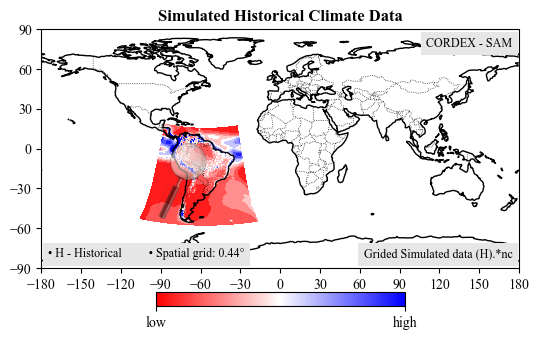

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from matplotlib import rcParams as rc
rc['font.family'] = 'serif'
rc['font.serif'] = ['Times New Roman']
rc['font.size'] = 10
rc['text.usetex'] = False

def get_custom_colormap(data):
    unique_vals = np.unique(data)
    num_colors = len(unique_vals)
    color_map = plt.cm.get_cmap("bwr_r", num_colors)
    return mcolors.ListedColormap(color_map(np.arange(num_colors)))

# Define the projection
projection = ccrs.PlateCarree()

# Crear la figura y el eje
fig, ax1 = plt.subplots(figsize=(10.5, 3.5), subplot_kw={'projection': projection})

# Dibujar el contorno lleno con niveles especificados
clim_plot = ax1.contourf(clim.lon, clim.lat, clim, levels=np.arange(0, 20, 2),
                         extend='max', transform=projection,
                         cmap=get_custom_colormap(clim), add_colorbar=False)

# Configuración de elementos del mapa
ax1.set_global()
ax1.coastlines(linewidth=1, color='black')
ax1.add_feature(cfeature.BORDERS, linestyle='dotted', linewidth=0.5, edgecolor='black')

# Configuración de etiquetas de ejes
ax1.set_xlabel("", fontsize=10, labelpad=10)
ax1.set_ylabel("", fontsize=10, labelpad=10)
ax1.set_xticks(np.arange(-180, 181, 30))
ax1.set_yticks(np.arange(-90, 91, 30))

# Crear manualmente la barra de colores con etiquetas personalizadas
cbar_ticks = [clim.min(), clim.max()]
cbar_tick_labels = ['low', 'high']
norm = mcolors.Normalize(vmin=clim.min(), vmax=clim.max())
sm = plt.cm.ScalarMappable(cmap="bwr_r", norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax1, orientation='horizontal', pad=0.088, fraction=0.050, aspect=18, ticks=cbar_ticks)
cbar.set_ticklabels(cbar_tick_labels)
cbar.set_label("", fontsize=12, labelpad=10)

# Añadir la imagen de fondo
img = plt.imread('C:/Users/ASUS/Desktop/data-carpentry/Photo2.png')
img_extent = [-50, -97, 9, -55]

rotated_img = np.rot90(img)
ax1.imshow(rotated_img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), alpha=0.55, zorder=10)

# Añadir información adicional
info_box_text = 'Grided Simulated data (H).*nc'
ax1.text(63, -82, info_box_text, transform=ccrs.PlateCarree(), fontsize=8.7, bbox=dict(facecolor='0.9', edgecolor='none'))

info_box_text1 = '• H - Historical         • Spatial grid: 0.44°'
ax1.text(-175, -82, info_box_text1, transform=ccrs.PlateCarree(), fontsize=8.7, bbox=dict(facecolor='0.9', edgecolor='none'))

info_box_text2 = 'CORDEX - SAM'
ax1.text(110, 77, info_box_text2, transform=ccrs.PlateCarree(), fontsize=8.7, bbox=dict(facecolor='0.9', edgecolor='none'))

# Añadir título
plt.title("Simulated Historical Climate Data", fontsize=12, fontweight='bold')

# Ajustar el diseño
plt.tight_layout()

# Guardar la figura con alta resolución
plt.savefig('D:/A/seasonal_trend_PISCO_RAIN4PE_high_res.png', transparent=False, dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()


In [ ]:
#https://github.com/Hydrology-IFH/diag-eff/blob/master/egu_2020.ipynb
#https://github.com/HaoLi2025/Python-Practical-Application-on-Climate-Variability-Studies/blob/master/ex29-Identify%20Patterns%20in%20the%20Coupled%20Fields%20of%20SLP%20and%20SST%20through%20Canonical%20Correlation%20Analysis.ipynb

<xarray.Dataset>
Dimensions:    (time: 1140, bnds: 2, lat: 64, lon: 128)
Coordinates:
  * time       (time) object 2006-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
Attributes: (12/31)
    institution:            CCCma (Canadian Centre for Climate Modelling and ...
    institute_id:           CCCma
    experiment_id:          rcp85
    source:                 CanESM2 2010 atmosphere: CanAM4 (AGCM15i, T63L35)...
    model_id:               CanESM2
    forcing:                GHG,Oz,SA,BC,OC,LU,Sl (GHG includes CO2,CH4,N2O,C...
    ...                     ...
    table_id:               Table Amon (31 January 2011) 53b766a395ac416

<xarray.DataArray 'pr' (time: 372, lat: 14, lon: 25)>
array([[[   2.2135353,   19.493286 ,   31.494825 , ...,  135.14505  ,
           97.18402  ,   93.65233  ],
        [  64.73537  ,   49.854034 ,  180.89883  , ...,  139.90799  ,
          161.58052  ,  147.63214  ],
        [ 186.3155   ,  319.01794  ,  290.18652  , ...,  267.26575  ,
          156.19331  ,   93.94     ],
        ...,
        [-130.36592  ,  -91.35838  , -197.77519  , ..., -137.79433  ,
         -124.17802  , -113.977005 ],
        [-195.81094  , -168.19464  , -158.55154  , ..., -108.54408  ,
         -125.972855 , -114.03859  ],
        [-127.1469   , -126.412384 ,  -90.49434  , ..., -102.97008  ,
          -95.24376  ,  -78.742676 ]],

       [[  26.435558 ,   35.483784 ,   78.88966  , ...,  133.51764  ,
           81.02377  ,  116.474304 ],
        [ 182.62952  ,  199.35034  ,  295.63434  , ...,  159.48859  ,
          104.953964 ,   59.62406  ],
        [ 185.76054  ,  223.87877  ,  206.80556  , ...,  130.60728 

<Figure size 4000x3000 with 0 Axes>

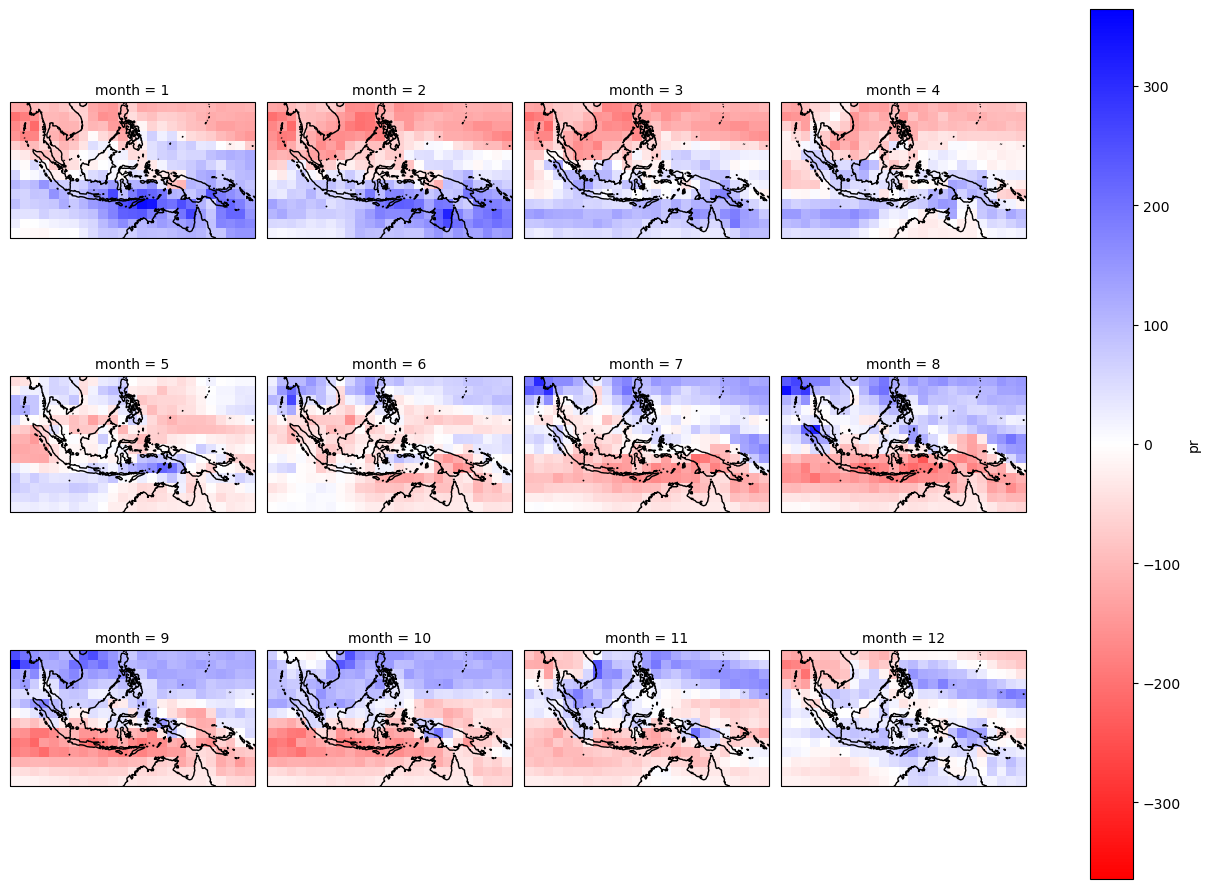

In [3]:
ds = xr.open_dataset("D:/descarga _esgf/CIMP5_2006_2100/pr_Amon_CanESM2_rcp85_r1i1p1_200601-210012.nc")
print(ds)
pr = ds['pr']
print(pr)
pr = pr*30*24*3600
print(pr)
pr_bm = pr.sel(lat=slice(-20,20),lon=slice(90,160))
print(pr_bm)

pr_bm_klim = pr_bm.sel(time=slice('2010-01','2070-12')).mean(dim='time')
pr_bm_anom = pr_bm - pr_bm_klim
print(pr_bm_anom)

pr_bm_anom_mod = pr_bm_anom.sel(time=slice('2070-01', None))
print(pr_bm_anom_mod)


<Figure size 4000x3000 with 0 Axes>

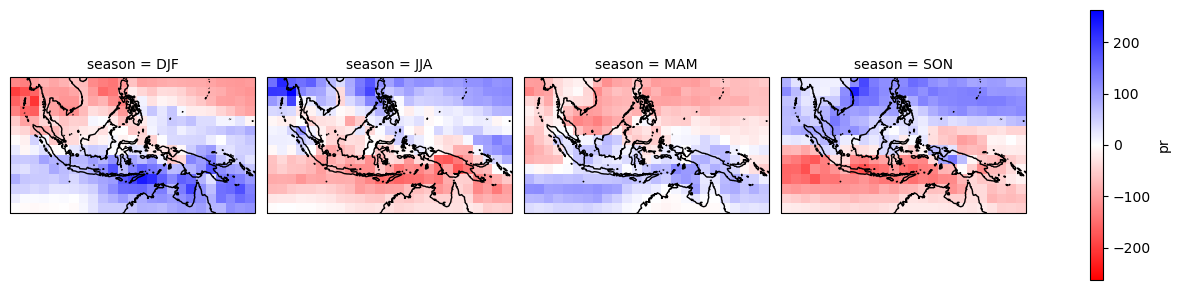

In [5]:
plt.figure(figsize=(40,30));
proj = ccrs.PlateCarree();
pr_anom_bul = pr_bm_anom_mod.groupby('time.season').mean(dim='time')
p = pr_anom_bul.plot(col='season',col_wrap=4,
                subplot_kws=dict(projection=proj),
                transform=ccrs.PlateCarree(),
                cmap = 'bwr_r');

for ax in p.axes.flat:
    ax.coastlines();

In [6]:
RAINday = xr.open_dataset("D:/R/RAIN4PE_daily_0.1d_1981_2015_v1.0.nc")
print(RAINday)
pr = RAINday['pcp']


<xarray.Dataset>
Dimensions:    (Longitude: 150, Latitude: 210, time: 12783)
Coordinates:
  * Longitude  (Longitude) float64 -81.95 -81.85 -81.75 ... -67.25 -67.15 -67.05
  * Latitude   (Latitude) float64 1.95 1.85 1.75 1.65 ... -18.75 -18.85 -18.95
  * time       (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2015-12-31
Data variables:
    pcp        (time, Latitude, Longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.0 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Sat Oct 02 23:41:36 2021: cdo mul global_dataset/RAIN4PE/RA...
    proj4:        +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0...
    created_by:   R, packages ncdf4 and raster (version 2.8-19)
    date:         2021-05-18 18:06:59
    CDO:          Climate Data Operators version 1.8.0 (http://mpimet.mpg.de/...


In [12]:
print(pr)
pr = pr*1
print(pr)
pr_bm = pr.sel(Latitude=slice(1.95,-18.95),Longitude=slice(-81.95,-67.05))
print(pr_bm)



<xarray.DataArray 'pcp' (time: 12783, Latitude: 210, Longitude: 150)>
array([[[        nan,         nan,         nan, ...,  5.252651  ,
          5.1727858 ,  4.9550753 ],
        [        nan,         nan,         nan, ...,  5.319156  ,
          5.1928983 ,  5.054665  ],
        [        nan,         nan,         nan, ...,  5.4510818 ,
          5.210168  ,  5.0677834 ],
        ...,
        [        nan,         nan,         nan, ...,  0.43561766,
          0.43326125,  0.41297203],
        [        nan,         nan,         nan, ...,  0.42788368,
          0.42128426,  0.4332078 ],
        [        nan,         nan,         nan, ...,  0.41408476,
          0.39167154,  0.41053215]],

       [[        nan,         nan,         nan, ..., 10.622249  ,
         11.001345  , 11.395034  ],
        [        nan,         nan,         nan, ..., 10.705056  ,
         10.959454  , 11.524283  ],
        [        nan,         nan,         nan, ..., 10.668818  ,
         11.079531  , 11.486748  

In [15]:
pr_bm_klim = pr_bm.sel(time=slice('1981-01','2015-12')).mean(dim='time')
pr_bm_anom = pr_bm - pr_bm_klim
print(pr_bm_anom)

pr_bm_anom_mod = pr_bm_anom.sel(time=slice('2015-01', None))
print(pr_bm_anom_mod)

<xarray.DataArray 'pcp' (time: 12783, Latitude: 209, Longitude: 150)>
array([[[        nan,         nan,         nan, ..., -3.1814623 ,
         -3.219841  , -3.4328985 ],
        [        nan,         nan,         nan, ..., -3.1893907 ,
         -3.279202  , -3.382419  ],
        [        nan,         nan,         nan, ..., -3.0867429 ,
         -3.3004313 , -3.420864  ],
        ...,
        [        nan,         nan,         nan, ..., -0.39593363,
         -0.42346194, -0.5093836 ],
        [        nan,         nan,         nan, ..., -0.35991767,
         -0.38946918, -0.46240944],
        [        nan,         nan,         nan, ..., -0.36355585,
         -0.39342183, -0.43008024]],

       [[        nan,         nan,         nan, ...,  2.1881351 ,
          2.608718  ,  3.00706   ],
        [        nan,         nan,         nan, ...,  2.1965094 ,
          2.4873533 ,  3.0871992 ],
        [        nan,         nan,         nan, ...,  2.1309938 ,
          2.5689316 ,  2.9981003 

<Figure size 4000x3000 with 0 Axes>

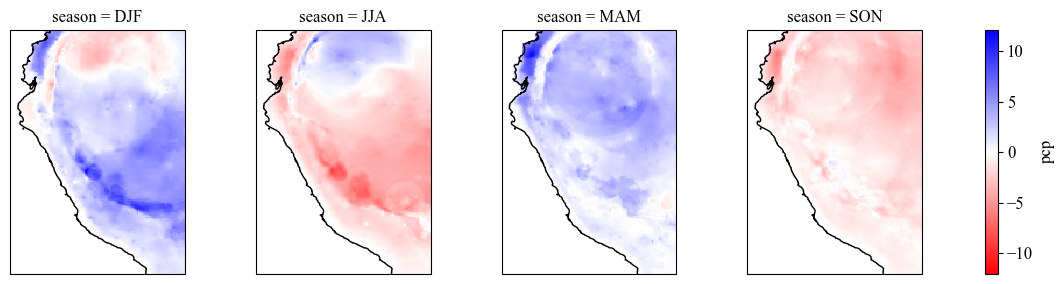

In [20]:
plt.figure(figsize=(40,30));
proj = ccrs.PlateCarree();
pr_anom_bul = pr_bm_anom_mod.groupby('time.season').mean(dim='time')
p = pr_anom_bul.plot(col='season',col_wrap=4,
                subplot_kws=dict(projection=proj),
                transform=ccrs.PlateCarree(),
                cmap = 'bwr_r');

for ax in p.axes.flat:
    ax.coastlines();

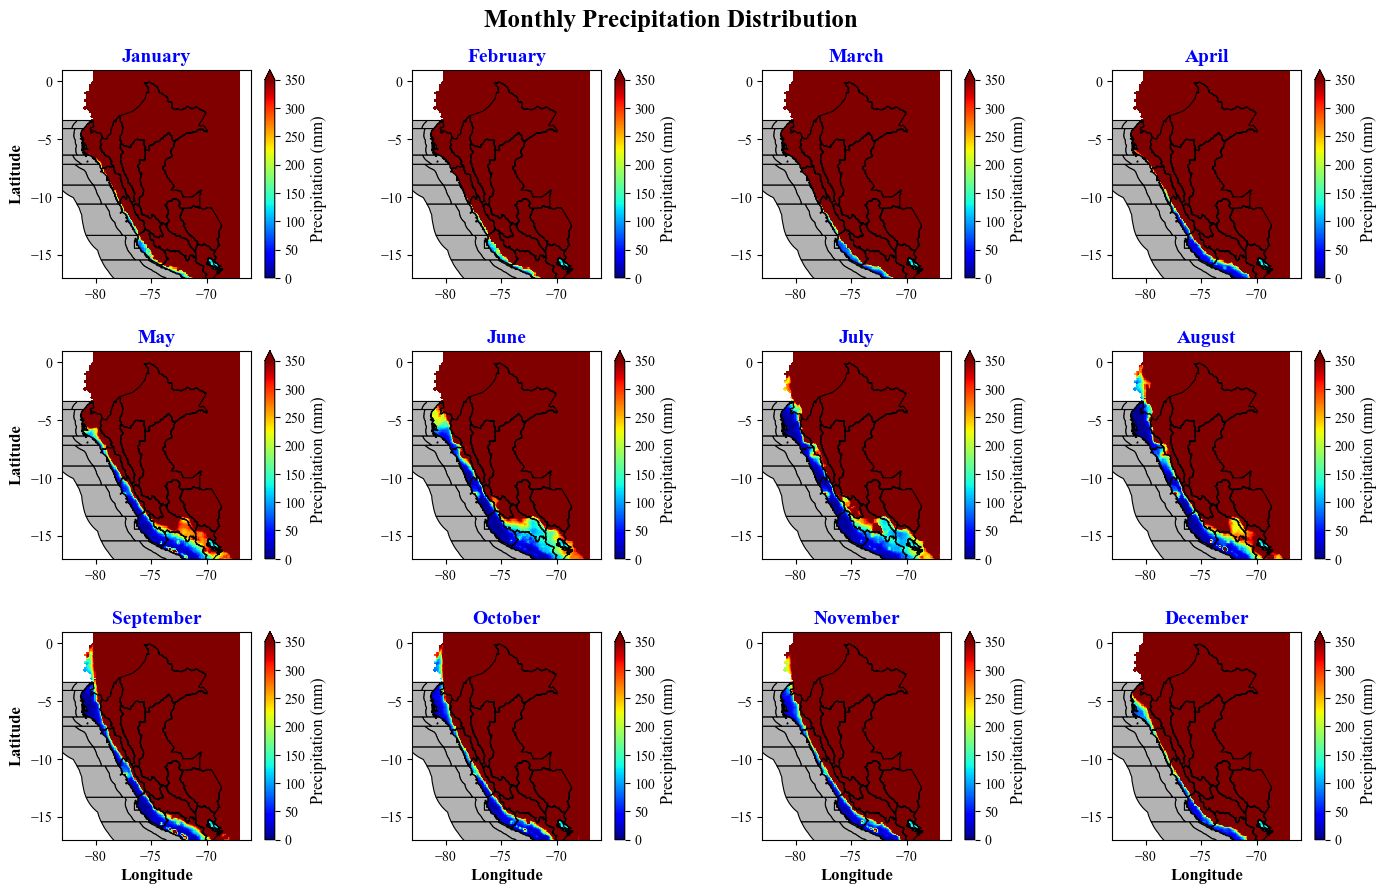

In [7]:
ds = RAINday
ds_mon = ds.groupby('time.month').sum()

import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
landmask = ds.pcp.sum(dim='time')>0
import seaborn as sns
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load your shapefile data using GeoPandas
shapefile_path = 'D:/T_JONA/red_amazonas/cuen_pacif.shp'
gdf = gpd.read_file(shapefile_path)

second_shapefile_path = 'D:/T_JONA/red_amazonas/Amazon.shp'#second_shapefile_path = 'D:/T_JONA/red_amazonas/Uni_Clas_Marino_Costero.shp'
gdf2 = gpd.read_file(second_shapefile_path)

second_shapefile_path = 'D:/T_JONA/red_amazonas/Titicaca.shp'
gdf3 = gpd.read_file(second_shapefile_path)

second_shapefile_path = 'D:/T_JONA/red_amazonas/lago.geojson'
gdf4 = gpd.read_file(second_shapefile_path)

second_shapefile_path = 'D:/T_JONA/red_amazonas/Uni_Clas_Marino_Costero.shp'
gdf5 = gpd.read_file(second_shapefile_path)

sns.set_palette("YlGnBu")

fig = plt.figure(figsize=[14, 10], facecolor='w')
plt.subplots_adjust(bottom=0.15, top=0.92, left=0.04, right=0.99, 
                    wspace=0.25, hspace=0.35) 

nrows = 3
ncols = 4

for i in range(1, 13):
    plt.subplot(nrows, ncols, i)
    dataplot = ds_mon.pcp[i-1, :, :].where(landmask)
    ax = plt.gca()
    p = ax.pcolormesh(ds_mon.Longitude, ds_mon.Latitude, dataplot,
                      vmax=350, vmin=0, cmap='jet')
    ax.set_xlim([-83, -66])
    ax.set_ylim([-17, 1])
    
    month_name = calendar.month_name[i]
    ax.set_title(month_name, fontsize=14, fontweight='bold', color='b')
    ax.tick_params(axis='both', labelsize=10)
    
    if i % ncols == 1:
        ax.set_ylabel('Latitude', fontsize=12, fontweight='bold')
    if i > ncols * (nrows - 1):
        ax.set_xlabel('Longitude', fontsize=12, fontweight='bold')

    # Add the shapefile geometries to the subplot
    gdf.plot(ax=ax, linewidth=0.8, edgecolor='black', color='none')
    gdf2.plot(ax=ax, linewidth=0.8, edgecolor='black', color='none')
    gdf5.plot(ax=ax, linewidth=0.8, edgecolor='black', color='.7')
    gdf3.plot(ax=ax, linewidth=0.8, edgecolor='black', color='none')
    gdf4.plot(ax=ax, linewidth=0.8, edgecolor='black', color='cyan')
    # Add a colorbar inside each subplot
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cb = plt.colorbar(p, cax=cax, orientation='vertical', extend='max')
    cb.ax.tick_params(labelsize=10)
    cb.set_label(label='Precipitation (mm)', color='k', size=12)

plt.suptitle('Monthly Precipitation Distribution', fontsize=18, fontweight='bold', y=0.98)
plt.show()

# Clip_.shp

In [25]:
import xarray as xr
import rioxarray as rxr
import geopandas as gpd
import matplotlib.pyplot as plt
RAINday = xr.open_dataset("D:/R/RAIN4PE_daily_0.1d_1981_2015_v1.0.nc")
RAINday = RAINday.rio.write_crs(4326)
RAINday

<xarray.Dataset>
Dimensions:      (Longitude: 150, Latitude: 210, time: 12783)
Coordinates:
  * Longitude    (Longitude) float64 -81.95 -81.85 -81.75 ... -67.15 -67.05
  * Latitude     (Latitude) float64 1.95 1.85 1.75 1.65 ... -18.75 -18.85 -18.95
  * time         (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2015-12-31
    spatial_ref  int32 0
Data variables:
    pcp          (time, Latitude, Longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.0 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Sat Oct 02 23:41:36 2021: cdo mul global_dataset/RAIN4PE/RA...
    proj4:        +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0...
    created_by:   R, packages ncdf4 and raster (version 2.8-19)
    date:         2021-05-18 18:06:59
    CDO:          Climate Data Operators version 1.8.0 (http://mpimet.mpg.de/...

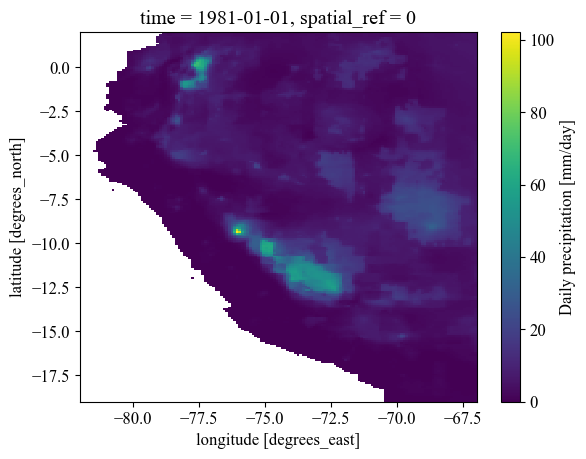

In [26]:
RAINday['pcp'].isel(time=0).plot()

In [33]:
yak_gdf = gpd.GeoDataFrame.from_file('D:/T_JONA/TESIS_PISCO/DEPARTAMENTOS.shp')
des_gdf = gpd.GeoDataFrame.from_file('D:/T_JONA/TESIS_PISCO/DEPARTAMENTOS.shp')
yak_gdf.head()

,IDDPTO,DEPARTAMEN,CAPITAL,FUENTE,geometry
0,01,AMAZONAS,CHACHAPOYAS,INEI,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990..."
1,02,ANCASH,HUARAZ,INEI,"POLYGON ((-77.64692 -8.05086, -77.64669 -8.052..."
2,03,APURIMAC,ABANCAY,INEI,"POLYGON ((-73.74632 -13.17456, -73.74570 -13.1..."
3,04,AREQUIPA,AREQUIPA,INEI,"POLYGON ((-71.98109 -14.64062, -71.98093 -14.6..."
4,05,AYACUCHO,AYACUCHO,INEI,"POLYGON ((-74.34843 -12.17503, -74.35000 -12.1..."


<AxesSubplot: >

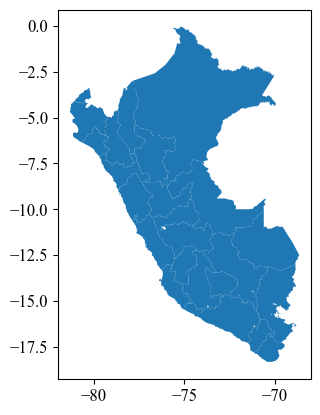

In [28]:
yak_gdf.plot()

# Clip out from the full dataset

In [34]:
yakima_ds = RAINday.rio.clip(yak_gdf.geometry.values, yak_gdf.crs)
deschutes_ds = RAINday.rio.clip(des_gdf.geometry.values, des_gdf.crs)

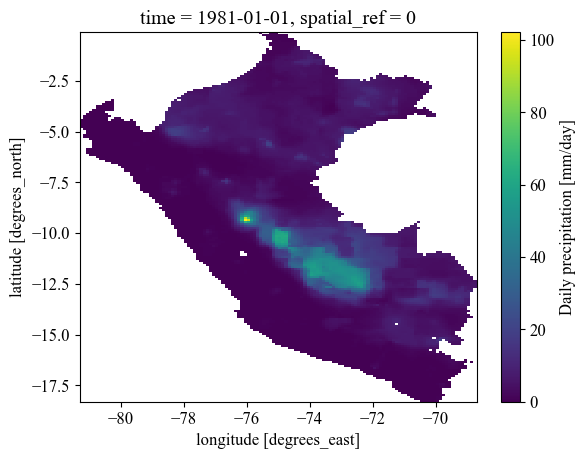

In [30]:
yakima_ds['pcp'].isel(time=0).plot()

# Now take the spatial means and compare timeseries

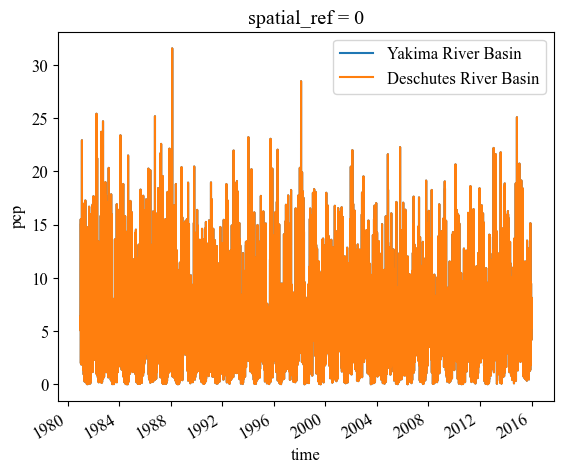

In [36]:
yakima_ds['pcp'].mean(dim=['Latitude', 'Longitude']).plot(label='Yakima River Basin')
deschutes_ds['pcp'].mean(dim=['Latitude', 'Longitude']).plot(label='Deschutes River Basin')
plt.legend()

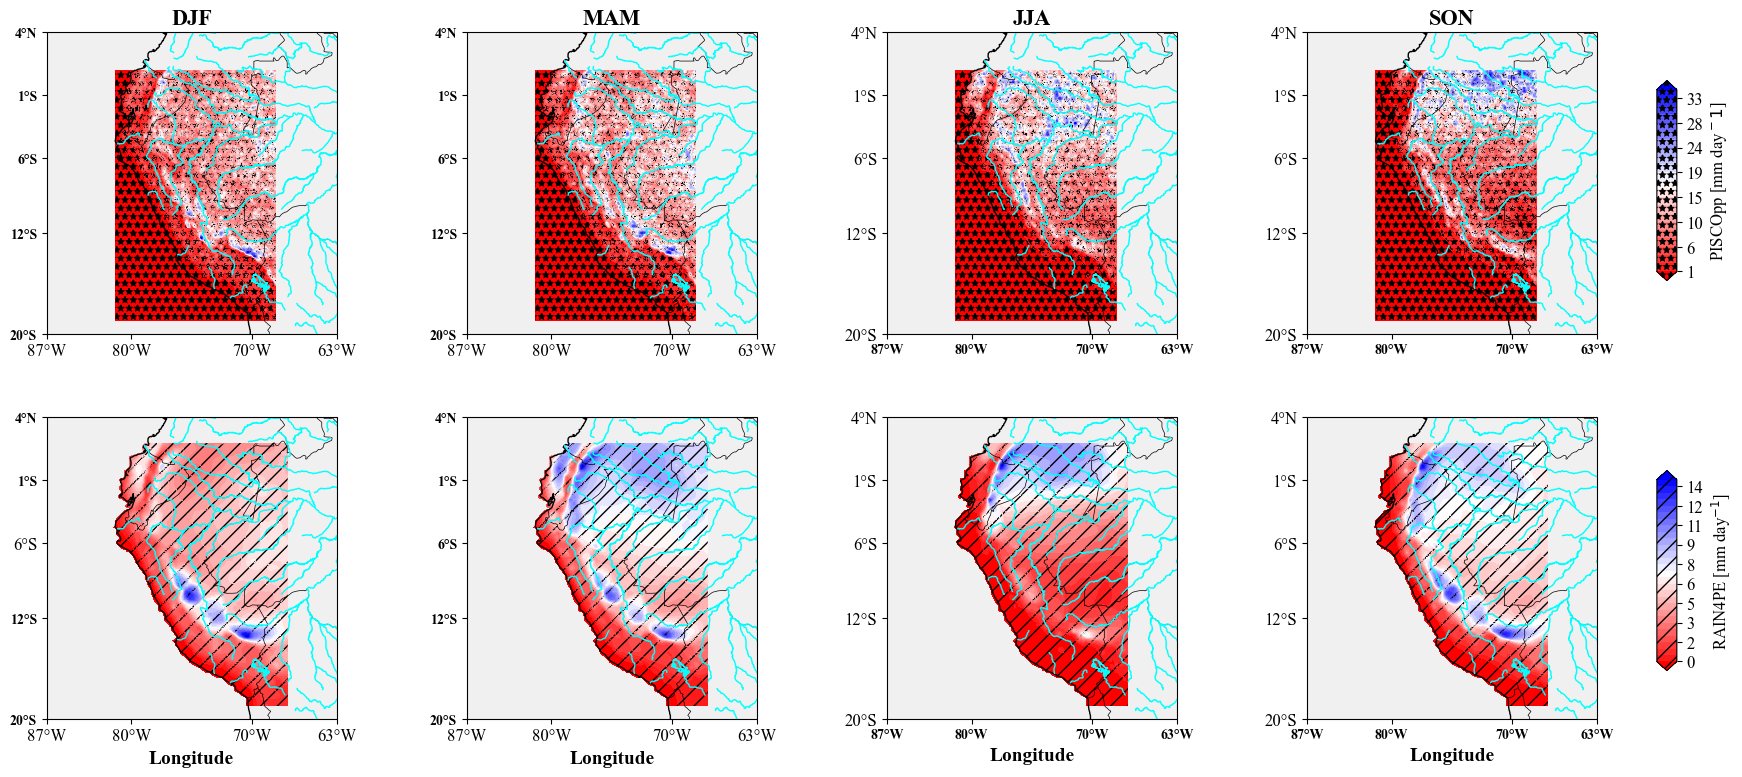

In [7]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.colors as mcolors
import cmocean as cm
import xarray as xr
import geopandas as gpd

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Times New Roman']},size=12)
rc('text', usetex=False)
# Define the projection
projection = ccrs.PlateCarree()

# Set subplots layout and size
fig, axes = plt.subplots(2, 4, sharex=True, sharey=True, subplot_kw=dict(projection=ccrs.PlateCarree()))
fig.set_size_inches(20, 10)  # Ajustar el tamaño del gráfico según tus necesidades

# Define a list of seasons
seasons = ('DJF', 'MAM', 'JJA', 'SON')

second_shapefile_path = 'D:/T_JONA/red_amazonas/lago.geojson'
gdf = gpd.read_file(second_shapefile_path)

# Define a custom colormap based on unique values in the data
def get_custom_colormap(data):
    unique_vals = np.unique(data)
    num_colors = len(unique_vals)
    color_map = plt.cm.get_cmap('cubehelix_r', num_colors)  # Use a different colormap
    return mcolors.ListedColormap(color_map(np.arange(num_colors)))

# Trazar datos de temporadas
for i, season in enumerate(seasons):
    ax = axes[0, i]  # Primera fila para seas_pp
    data_pp = seas_pp['variable'].sel(season=season)
    vmin_pp, vmax_pp = data_pp.min().values, data_pp.max().values
    
    contour_plot_pp = ax.contourf(data_pp.longitude, data_pp.latitude, data_pp,
                                  transform=projection, cmap=get_custom_colormap(data_pp), levels=30, extend='both',
                                  vmin=vmin_pp, vmax=vmax_pp, hatches=['//  '])
    
    ax.set_xlim(data_pp.longitude.min().values, data_pp.longitude.max().values)
    ax.set_ylim(data_pp.latitude.min().values, data_pp.latitude.max().values)
    ax.set_xticks(np.arange(data_pp.longitude.min().values, data_pp.longitude.max().values, 10), crs=projection)
    ax.set_yticks(np.arange(data_pp.latitude.min().values, data_pp.latitude.max().values, 10), crs=projection)
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    #ax.add_feature(cfeature.RIVERS)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'),edgecolor = 'aqua')
    ax.set_facecolor('#f0f0f0')

    ax = axes[1, i]  # Segunda fila para seas_pcp
    data_pcp = seas_pcp['pcp'].sel(season=season)
    vmin_pcp, vmax_pcp = data_pcp.min().values, data_pcp.max().values
    
    contour_plot_pcp = ax.contourf(data_pcp.Longitude, data_pcp.Latitude, data_pcp,
                                    transform=projection, cmap=get_custom_colormap(data_pcp), levels=30, extend='both',
                                    vmin=vmin_pcp, vmax=vmax_pcp, hatches=['//  '])
    
    ax.set_xlim(data_pcp.Longitude.min().values, data_pcp.Longitude.max().values)
    ax.set_ylim(data_pcp.Latitude.min().values, data_pcp.Latitude.max().values)
    ax.set_xticks(np.arange(data_pcp.Longitude.min().values, data_pcp.Longitude.max().values, 10), crs=projection)
    ax.set_yticks(np.arange(data_pcp.Latitude.min().values, data_pcp.Latitude.max().values, 10), crs=projection)
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    #ax.add_feature(cfeature.RIVERS)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'),edgecolor = 'aqua')
    ax.set_facecolor('#f0f0f0')
    
# Agregar nombres de estaciones en la primera fila de cada columna
for i, season in enumerate(seasons):
    axes[0, i].set_title(season, fontsize=16, fontweight='bold')

# Valores numéricos de latitud en las dos primeras filas
for ax in axes[:2, :]:
    ax[0].set_yticks([-20, 4], crs=projection)
    ax[0].set_yticklabels(['20°S', '4°N'], fontsize=10, fontweight='bold')
    ax[1].set_yticks([-20, -12,-6,-1,4], crs=projection)
    ax[1].set_yticklabels(['20°S','12°S','6°S','1°S','4°N' ], fontsize=10, fontweight='bold')

# Valores numéricos de longitud en las cuatro últimas columnas
for ax in axes[:, -4:]:
    ax[-1].set_xticks([-70, -80, -87], crs=projection)
    ax[-1].set_xticklabels(['70°W', '80°W', '87°W'], fontsize=10, fontweight='bold')
    ax[-2].set_xticks([-63, -70, -80, -87], crs=projection)
    ax[-2].set_xticklabels(['63°W', '70°W', '80°W', '87°W'], fontsize=10, fontweight='bold')

# Set the x-axis label for the last row
for ax in axes[-1, :]:
    ax.set_xlabel('Longitude', fontsize=14, fontweight='bold')

# Flatten axes and get subplots positions
DP = axes.T.flatten()

# Crear colorbars con más espacio
cax_pp = fig.add_axes([0.93, 0.59, 0.01, 0.2])
cax_pcp = fig.add_axes([0.93, 0.2, 0.01, 0.2])

# Colocar colorbars
cbar_pp = plt.colorbar(contour_plot_pp, cax=cax_pp, label=f'PISCOpp [mm day$^{-1}$]', orientation='vertical',format='%d')
cbar_pcp = plt.colorbar(contour_plot_pcp, cax=cax_pcp, label='RAIN4PE [mm day$^{-1}$]', orientation='vertical',format='%d')

# Ajustar diseño
plt.subplots_adjust(wspace=0.45, hspace=0.0, right=0.9)  # Ajustar el valor "right" para dar más espacio al colorbar

# Añade el shapefile a todos los mapas
for ax in axes.flatten():
    #gdf.boundary.plot(ax=ax, linewidth=0.8, color='red', linestyle='--')
    gdf.boundary.plot(ax=ax, linewidth=0.8, edgecolor='black', color='cyan')
# Guardar o mostrar el gráfico
#plt.savefig('seasonal_PISCO_RAIN4PE.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()


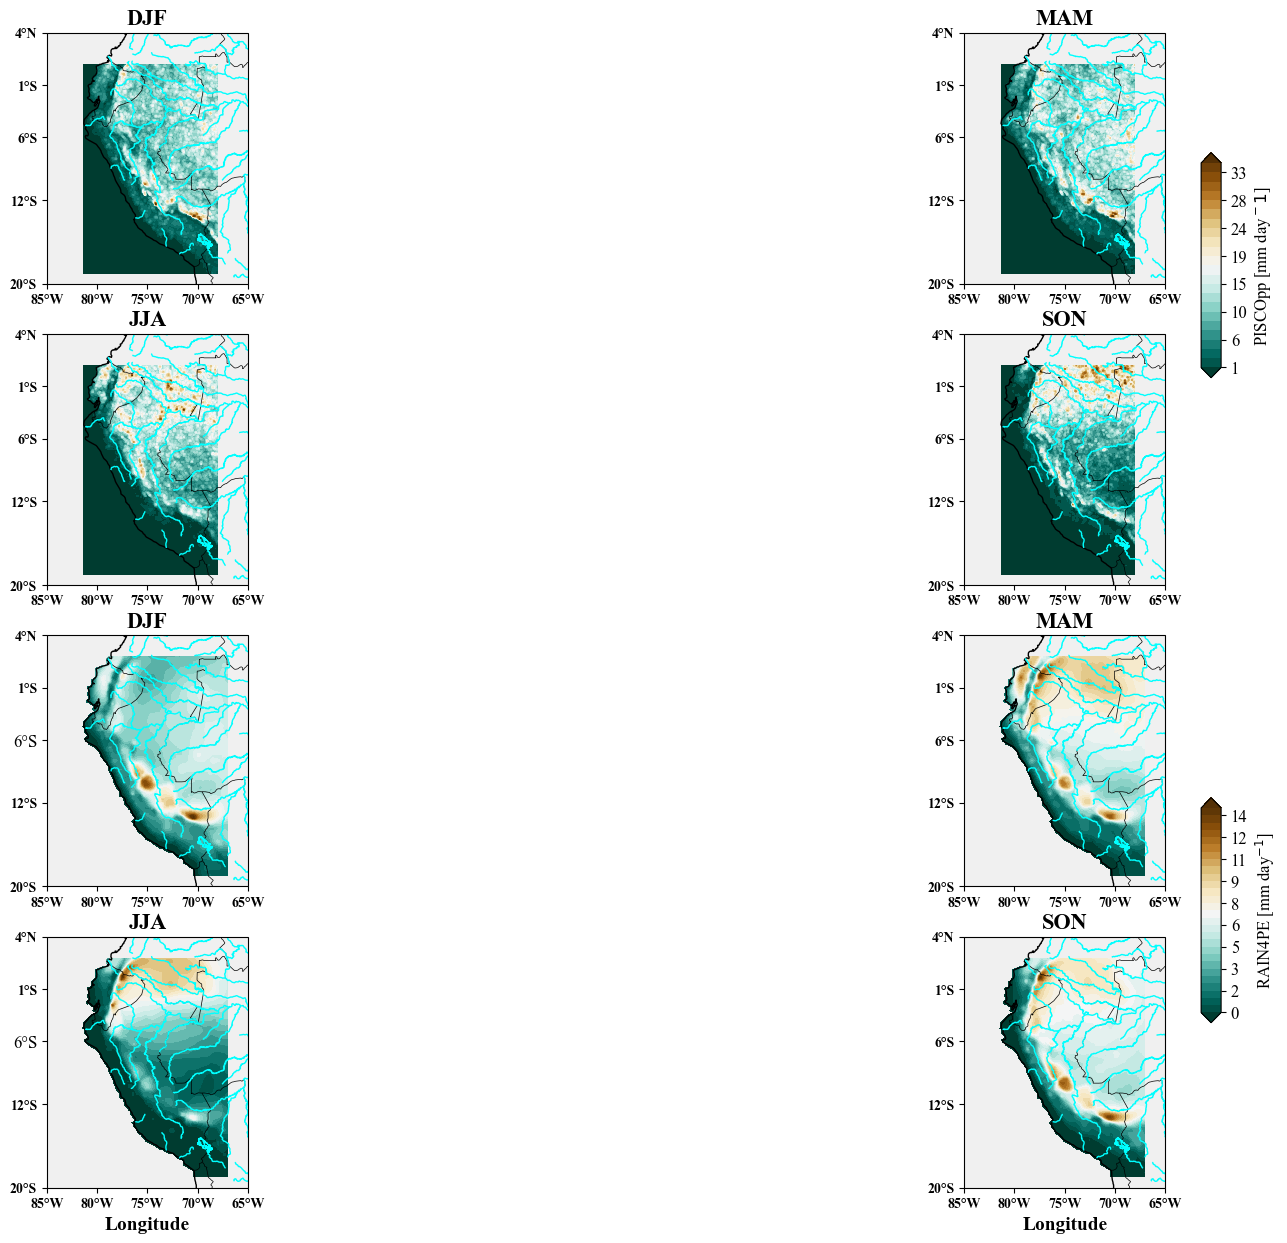

In [55]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.colors as mcolors
import cmocean as cm
import xarray as xr
import geopandas as gpd

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Times New Roman']},size=12)
rc('text', usetex=False)

# Define the projection
projection = ccrs.PlateCarree()

# Set subplots layout and size
fig, axes = plt.subplots(4, 2, sharex=True, sharey=True, subplot_kw=dict(projection=ccrs.PlateCarree()))
fig.set_size_inches(20, 15)  # Ajustar el tamaño del gráfico según tus necesidades

# Define a list of seasons
seasons = ('DJF', 'MAM', 'JJA', 'SON')

second_shapefile_path = 'D:/T_JONA/red_amazonas/lago.geojson'
gdf = gpd.read_file(second_shapefile_path)

# Define a custom colormap based on unique values in the data
def get_custom_colormap(data):
    unique_vals = np.unique(data)
    num_colors = len(unique_vals)
    color_map = plt.cm.get_cmap('BrBG_r', num_colors)  # Use a different colormap
    return mcolors.ListedColormap(color_map(np.arange(num_colors)))

# Trazar datos de temporadas
for i, season in enumerate(seasons):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    data_pp = seas_pp['variable'].sel(season=season)
    vmin_pp, vmax_pp = data_pp.min().values, data_pp.max().values
    
    contour_plot_pp = ax.contourf(data_pp.longitude, data_pp.latitude, data_pp,
                                  transform=projection, cmap=get_custom_colormap(data_pp), levels=30, extend='both',
                                  vmin=vmin_pp, vmax=vmax_pp)
    
    ax.set_xlim(data_pp.longitude.min().values, data_pp.longitude.max().values)
    ax.set_ylim(data_pp.latitude.min().values, data_pp.latitude.max().values)
    ax.set_xticks(np.arange(data_pp.longitude.min().values, data_pp.longitude.max().values, 10), crs=projection)
    ax.set_yticks(np.arange(data_pp.latitude.min().values, data_pp.latitude.max().values, 10), crs=projection)
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'),edgecolor='aqua')
    ax.set_facecolor('#f0f0f0')
    
    
# Trazar datos de precipitación
for i, season in enumerate(seasons):
    row = i // 2
    col = i % 2
    ax = axes[row+2, col]  # Utilizar filas 2 y 3 para datos de precipitación
    data_pcp = seas_pcp['pcp'].sel(season=season)
    vmin_pcp, vmax_pcp = data_pcp.min().values, data_pcp.max().values
    
    contour_plot_pcp = ax.contourf(data_pcp.Longitude, data_pcp.Latitude, data_pcp,
                                    transform=projection, cmap=get_custom_colormap(data_pcp), levels=30, extend='both',
                                    vmin=vmin_pcp, vmax=vmax_pcp)
    
    ax.set_xlim(data_pcp.Longitude.min().values, data_pcp.Longitude.max().values)
    ax.set_ylim(data_pcp.Latitude.min().values, data_pcp.Latitude.max().values)
    ax.set_xticks(np.arange(data_pcp.Longitude.min().values, data_pcp.Longitude.max().values, 10), crs=projection)
    ax.set_yticks(np.arange(data_pcp.Latitude.min().values, data_pcp.Latitude.max().values, 10), crs=projection)
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='aqua')
    ax.set_facecolor('#f0f0f0')

# Agregar nombres de estaciones en la primera fila de cada columna
for i, season in enumerate(seasons):
    row = i // 2
    col = i % 2
    axes[row, col].set_title(season, fontsize=16, fontweight='bold')

# Agregar nombres de estaciones en la tercera y cuarta fila de cada columna
for i, season in enumerate(seasons):
    row = (i // 2) + 2  # Ajuste para empezar desde la tercera fila (índice 2)
    col = i % 2
    axes[row, col].set_title(season, fontsize=16, fontweight='bold')

    
# Valores numéricos de latitud en las dos primeras filas
for row in range(4): #4 FILAS
    axes[row, 0].set_yticks([-20, 4], crs=projection)
    axes[row, 0].set_yticklabels(['20°S', '4°N'], fontsize=10, fontweight='bold')
    axes[row, 1].set_yticks([-20, -12, -6, -1, 4], crs=projection)
    axes[row, 1].set_yticklabels(['20°S', '12°S', '6°S', '1°S', '4°N'], fontsize=10, fontweight='bold')

# Valores numéricos de longitud en todas las filas
for row in range(4):
    for col in range(2):
        axes[row, col].set_xticks([-65, -70, -75, -80, -85], crs=projection)
        axes[row, col].set_xticklabels(['65°W', '70°W', '75°W', '80°W', '85°W'], fontsize=10, fontweight='bold')


# Set the x-axis label for the last row
for ax in axes[-1, :]:
    ax.set_xlabel('Longitude', fontsize=14, fontweight='bold')

# Crear colorbars con más espacio
cax_pp = fig.add_axes([0.81, 0.65, 0.01, 0.15])
cax_pcp = fig.add_axes([0.81, 0.22, 0.01, 0.15])
# Colocar colorbars
cbar_pp = plt.colorbar(contour_plot_pp, cax=cax_pp, label=f'PISCOpp [mm day$^{-1}$]', orientation='vertical', format='%d')
cbar_pcp = plt.colorbar(contour_plot_pcp, cax=cax_pcp, label='RAIN4PE [mm day$^{-1}$]', orientation='vertical', format='%d')


# Ajustar diseño
plt.subplots_adjust(wspace=0.45, hspace=0.2, right=0.9)  # Ajustar el valor "right" para dar más espacio al colorbar

# Añade el shapefile a todos los mapas
for ax in axes.flatten():
    gdf.boundary.plot(ax=ax, linewidth=0.8, edgecolor='black', color='cyan')

# Guardar o mostrar el gráfico
plt.show()


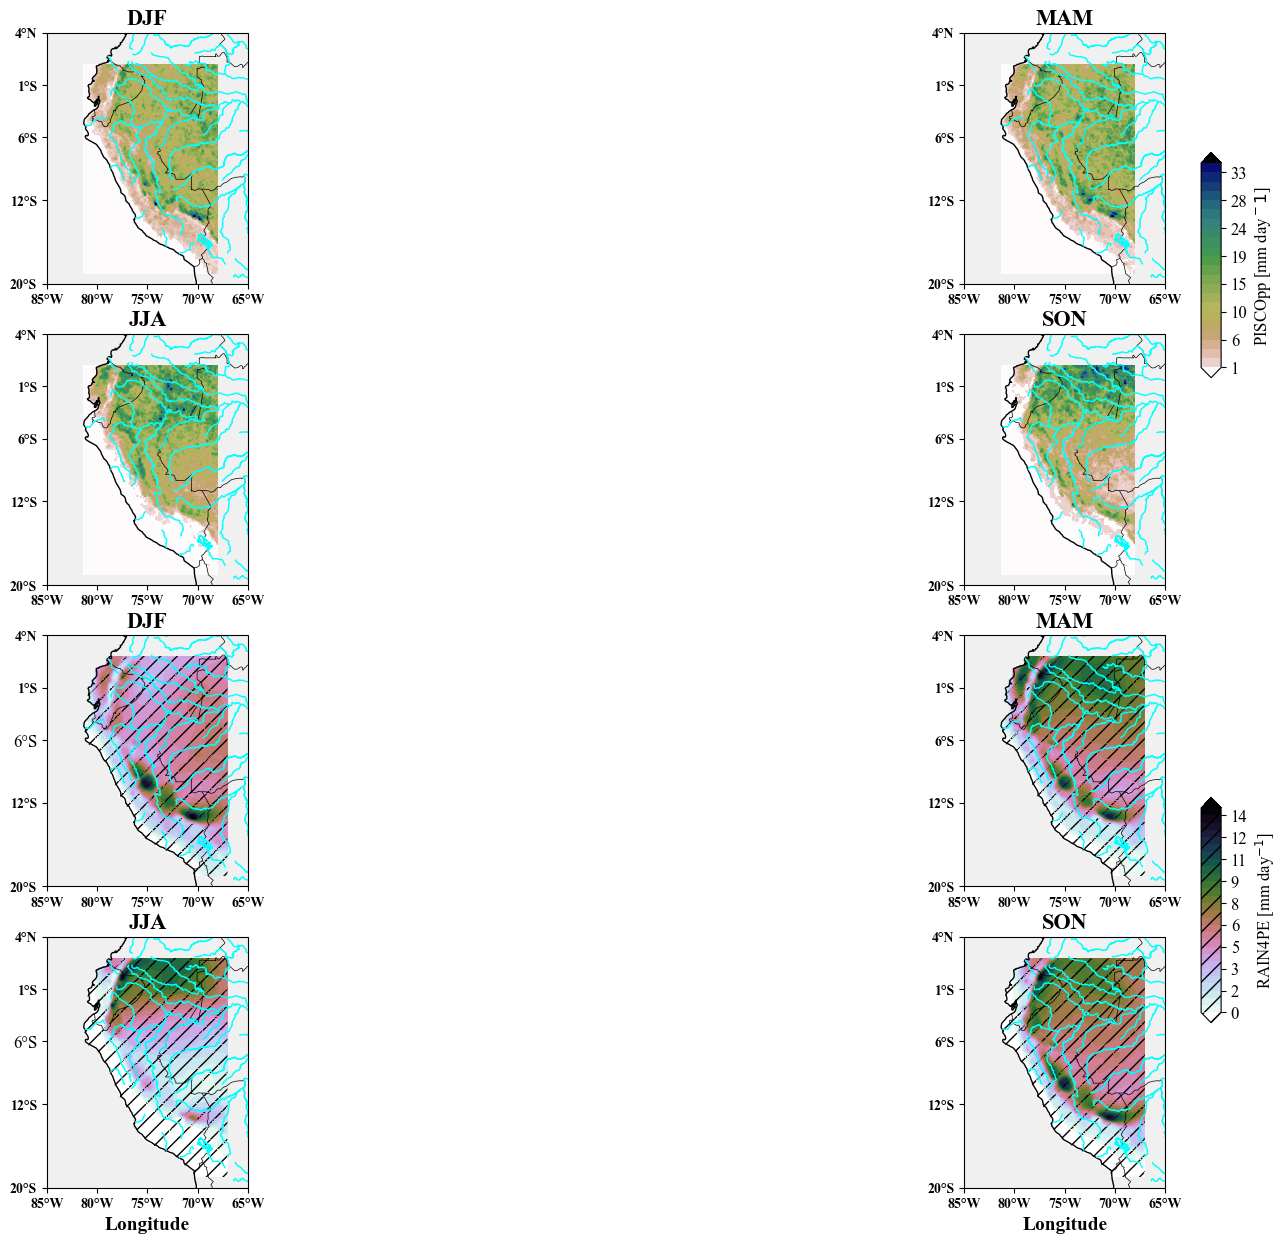

In [68]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.colors as mcolors
import cmocean as cm
import xarray as xr
import geopandas as gpd

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Times New Roman']},size=12)
rc('text', usetex=False)

# Define the projection
projection = ccrs.PlateCarree()

# Set subplots layout and size
fig, axes = plt.subplots(4, 2, sharex=True, sharey=True, subplot_kw=dict(projection=ccrs.PlateCarree()))
fig.set_size_inches(20, 15)  # Ajustar el tamaño del gráfico según tus necesidades

# Define a list of seasons
seasons = ('DJF', 'MAM', 'JJA', 'SON')

second_shapefile_path = 'D:/T_JONA/red_amazonas/lago.geojson'
gdf = gpd.read_file(second_shapefile_path)

# Define a custom colormap based on unique values in the data
# Define colormaps para cada conjunto de datos
colormap_pp = plt.cm.get_cmap('gist_earth_r')
colormap_pcp = plt.cm.get_cmap('cubehelix_r')

# Trazar datos de temporadas
for i, season in enumerate(seasons):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    data_pp = seas_pp['variable'].sel(season=season)
    vmin_pp, vmax_pp = data_pp.min().values, data_pp.max().values
    
    contour_plot_pp = ax.contourf(data_pp.longitude, data_pp.latitude, data_pp,
                                  transform=projection, cmap=colormap_pp, levels=30, extend='both',
                                  vmin=vmin_pp, vmax=vmax_pp)
    
    ax.set_xlim(data_pp.longitude.min().values, data_pp.longitude.max().values)
    ax.set_ylim(data_pp.latitude.min().values, data_pp.latitude.max().values)
    ax.set_xticks(np.arange(data_pp.longitude.min().values, data_pp.longitude.max().values, 10), crs=projection)
    ax.set_yticks(np.arange(data_pp.latitude.min().values, data_pp.latitude.max().values, 10), crs=projection)
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='aqua')
    ax.set_facecolor('#f0f0f0')

# Trazar datos de precipitación
for i, season in enumerate(seasons):
    row = i // 2
    col = i % 2
    ax = axes[row+2, col]  # Utilizar filas 2 y 3 para datos de precipitación
    data_pcp = seas_pcp['pcp'].sel(season=season)
    vmin_pcp, vmax_pcp = data_pcp.min().values, data_pcp.max().values
    
    contour_plot_pcp = ax.contourf(data_pcp.Longitude, data_pcp.Latitude, data_pcp,
                                    transform=projection, cmap=colormap_pcp, levels=30, extend='both',
                                    vmin=vmin_pcp, vmax=vmax_pcp, hatches=['//'])
    
    ax.set_xlim(data_pcp.Longitude.min().values, data_pcp.Longitude.max().values)
    ax.set_ylim(data_pcp.Latitude.min().values, data_pcp.Latitude.max().values)
    ax.set_xticks(np.arange(data_pcp.Longitude.min().values, data_pcp.Longitude.max().values, 10), crs=projection)
    ax.set_yticks(np.arange(data_pcp.Latitude.min().values, data_pcp.Latitude.max().values, 10), crs=projection)
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='aqua')
    ax.set_facecolor('#f0f0f0')


# Agregar nombres de estaciones en la primera fila de cada columna
for i, season in enumerate(seasons):
    row = i // 2
    col = i % 2
    axes[row, col].set_title(season, fontsize=16, fontweight='bold')

# Agregar nombres de estaciones en la tercera y cuarta fila de cada columna
for i, season in enumerate(seasons):
    row = (i // 2) + 2  # Ajuste para empezar desde la tercera fila (índice 2)
    col = i % 2
    axes[row, col].set_title(season, fontsize=16, fontweight='bold')

    
# Valores numéricos de latitud en las dos primeras filas
for row in range(4): #4 FILAS
    axes[row, 0].set_yticks([-20, 4], crs=projection)
    axes[row, 0].set_yticklabels(['20°S', '4°N'], fontsize=10, fontweight='bold')
    axes[row, 1].set_yticks([-20, -12, -6, -1, 4], crs=projection)
    axes[row, 1].set_yticklabels(['20°S', '12°S', '6°S', '1°S', '4°N'], fontsize=10, fontweight='bold')

# Valores numéricos de longitud en todas las filas
for row in range(4):
    for col in range(2):
        axes[row, col].set_xticks([-65, -70, -75, -80, -85], crs=projection)
        axes[row, col].set_xticklabels(['65°W', '70°W', '75°W', '80°W', '85°W'], fontsize=10, fontweight='bold')


# Set the x-axis label for the last row
for ax in axes[-1, :]:
    ax.set_xlabel('Longitude', fontsize=14, fontweight='bold')

# Crear colorbars con más espacio
cax_pp = fig.add_axes([0.81, 0.65, 0.01, 0.15])
cax_pcp = fig.add_axes([0.81, 0.22, 0.01, 0.15])
# Colocar colorbars
cbar_pp = plt.colorbar(contour_plot_pp, cax=cax_pp, label=f'PISCOpp [mm day$^{-1}$]', orientation='vertical', format='%d')
cbar_pcp = plt.colorbar(contour_plot_pcp, cax=cax_pcp, label='RAIN4PE [mm day$^{-1}$]', orientation='vertical', format='%d')


# Ajustar diseño
plt.subplots_adjust(wspace=0.45, hspace=0.2, right=0.9)  # Ajustar el valor "right" para dar más espacio al colorbar

# Añade el shapefile a todos los mapas
for ax in axes.flatten():
    gdf.boundary.plot(ax=ax, linewidth=0.8, edgecolor='black', color='cyan')

# Guardar o mostrar el gráfico
plt.show()


In [175]:
import collections
import numpy as np
import pandas as pd


rchFile = 'D:/Articulo_SWAT/output.rch'


cols2Extract = [('SUB', (6, 10)), 
                ('year', (20, 25)), 
                ('flow', (38, 50)), 
                ('nitrate', (542, 553)), 
                ('phosphorus', (554, 565))]
cols2Extract = collections.OrderedDict(cols2Extract)

col_positions = list(cols2Extract.values())
col_names = list(cols2Extract.keys())
nyears = 20
df_weird = pd.read_fwf(rchFile, colspecs=col_positions, names=col_names, 
                       skiprows=8)
df= pd.read_fwf(rchFile, colspecs=col_positions, skiprows=8)
df.columns = col_names
filtered_df = df.loc[df['year'] <= nyears]
filtered_df.to_csv('output_rch.csv', sep=',', index=False)
filtered_df

,SUB,year,flow,nitrate,phosphorus
2250,1,18.0,0.08848,55530.0,6061.0
2251,2,18.0,0.07308,30730.0,1577.0
2252,3,18.0,0.22770,129900.0,12840.0
2253,4,18.0,0.02910,19040.0,2523.0
2254,5,18.0,0.07595,53040.0,3567.0
...,...,...,...,...,...
2370,121,18.0,1.49200,603400.0,57810.0
2371,122,18.0,2.82800,1157000.0,94710.0
2372,123,18.0,1.52500,616300.0,58640.0
2373,124,18.0,0.03420,12940.0,832.7


In [177]:
import collections
import numpy as np
import pandas as pd


rchFile = 'D:/Articulo_SWAT/output.hru'


cols2Extract = [('LULC', (1, 4)),
                ('HRU', (5,9)), 
                ('year', (30, 34)), 
                ('surfaceQ', (215, 224)), 
                ('lateralQ', (235, 244)), 
                ('NSURQ', (575, 584)), 
                ('NLATQ', (585, 594)), 
                ('Yield_tonperha', (695, 704)), 
                ('TileQ', (777, 786)), 
                ('TileNO3', (787, 796))]
cols2Extract = collections.OrderedDict(cols2Extract)

col_positions = list(cols2Extract.values())
col_names = list(cols2Extract.keys())
nyears = 20
df_weird = pd.read_fwf(rchFile, colspecs=col_positions, names=col_names, 
                       skiprows=8)
df= pd.read_fwf(rchFile, colspecs=col_positions, skiprows=8)
df.columns = col_names
filtered_df = df.loc[df['year'] <= nyears]
filtered_df.to_csv('output_hru.csv', sep=',', index=False)
filtered_df 

,LULC,HRU,year,surfaceQ,lateralQ,NSURQ,NLATQ,Yield_tonperha,TileQ,TileNO3
4176,OYB,1,18.0,13.044,5.152,0.182,0.168,6.764,0.0,0.0
4177,OYB,2,18.0,13.787,3.913,0.193,0.105,6.783,283.0,21.6
4178,OYB,3,18.0,11.164,1.719,0.139,0.261,6.493,332.0,23.5
4179,OYB,4,18.0,11.144,3.928,0.138,0.574,6.478,330.0,23.4
4180,ORN,5,18.0,12.300,4.446,0.152,0.668,6.748,332.0,22.0
...,...,...,...,...,...,...,...,...,...,...
4403,OYB,228,18.0,12.059,1.943,0.166,0.124,6.735,320.0,21.1
4404,OYB,229,18.0,12.039,4.469,0.166,0.280,6.727,317.0,21.1
4405,ORN,230,18.0,12.482,1.640,0.184,0.125,6.977,321.0,24.3
4406,OYB,231,18.0,12.101,1.943,0.167,0.124,6.736,320.0,21.1
